In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os

folder_path = './temperature_dataset'
temperature_tw = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # 
        df = pd.read_csv(os.path.join(folder_path, file_name))
        location, year = file_name.replace('.csv','').split('-')
        df['location'] = location
        df['year'] = year  
        temperature_tw = pd.concat([temperature_tw, df.iloc[1:,:]])
temperature_tw.to_csv('temperature_tw_merged_data.csv', index=False)


In [3]:
temperature_tw = temperature_tw.iloc[:,[0,7,-2,-1]]
temperature_tw.columns = ['month', 'temperature', 'location', 'year']


In [4]:
temperature_tw.info()
temperature_tw = temperature_tw.astype({'month':int, 'temperature':float, 'location':'category', 'year':int})
temperature_tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        144 non-null    object
 1   temperature  144 non-null    object
 2   location     144 non-null    object
 3   year         144 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   month        144 non-null    int32   
 1   temperature  144 non-null    float64 
 2   location     144 non-null    category
 3   year         144 non-null    int32   
dtypes: category(1), float64(1), int32(2)
memory usage: 3.6 KB


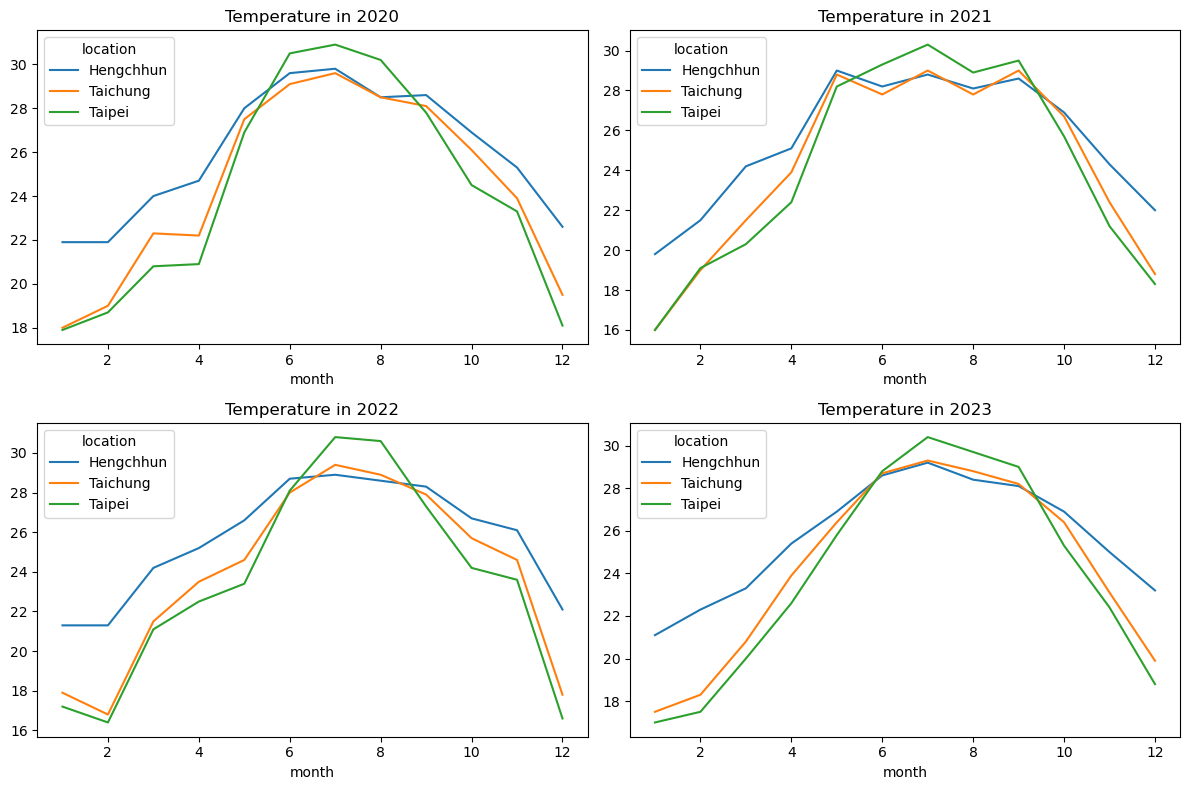

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
years = temperature_tw['year'].unique()
for idx, year in enumerate(years):
    row_idx = idx//2
    col_idx = idx % 2
    df_year = temperature_tw[temperature_tw.year==year]
    df_year.pivot_table(values='temperature', index='month', columns='location').plot(ax=axes[row_idx, col_idx], title=f'Temperature in {year}') 
    plt.tight_layout() #調整子圖之間的距離

In [6]:
covid_data = pd.read_csv('./covid19/Age_County_Gender_19Cov.csv')
covid_data.head()

,確定病名,發病年份,發病月份,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020,1,台中市,太平區,M,否,30-34,1
1,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020,1,空值,空值,F,是,50-54,3
2,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020,1,空值,空值,M,是,20-24,1
3,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020,1,空值,空值,M,是,40-44,1
4,嚴重特殊傳染性肺炎(112/3/19以前病例定義版本),2020,1,空值,空值,M,是,50-54,1


In [7]:
covid_data = covid_data.iloc[:,1:]
covid_data.columns = ['year', 'month', 'county', 'township', 'sex', 'foreigner', 'age_range', 'cases']

In [8]:
covid_data.drop(['township', 'foreigner'], axis=1, inplace=True)
covid_data.head()

,year,month,county,sex,age_range,cases
0,2020,1,台中市,M,30-34,1
1,2020,1,空值,F,50-54,3
2,2020,1,空值,M,20-24,1
3,2020,1,空值,M,40-44,1
4,2020,1,空值,M,50-54,1


<Axes: ylabel='county'>

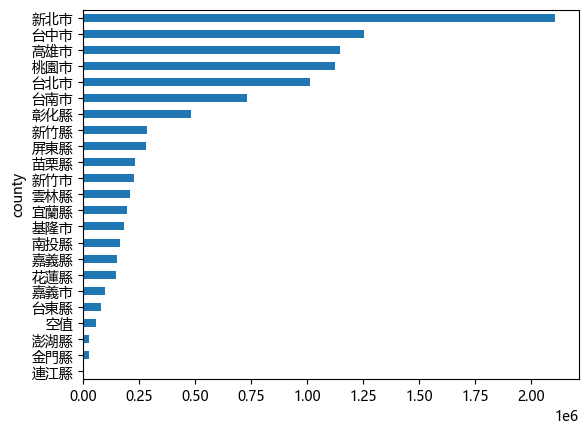

In [9]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用來顯示中文字體在matplotlib上
covid_data.groupby('county').cases.sum().sort_values().plot(kind='barh')

In [10]:
covid_data.county.replace('台中市','Taichung',inplace=True)
covid_data.county.replace('台北市','Taipei', inplace=True)
covid_data.county.replace('屏東縣','Hengchhun', inplace=True)

In [11]:
covid_data = covid_data[covid_data.county.isin(['Taichung','Taipei','Hengchhun'])].rename({'county':'location'},axis=1)
covid_data.head()

,year,month,location,sex,age_range,cases
0,2020,1,Taichung,M,30-34,1
48,2020,3,Taichung,F,30-34,1
49,2020,3,Taipei,F,45-49,1
50,2020,3,Taipei,F,45-49,1
51,2020,3,Taipei,M,20-24,1


In [12]:
covid_data.groupby(['year','month','location']).cases.sum()
covid_data = covid_data.reset_index().drop('index', axis=1)

In [13]:
covid_data = covid_data.astype({'month':'category'})
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32605 entries, 0 to 32604
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   year       32605 non-null  int64   
 1   month      32605 non-null  category
 2   location   32605 non-null  object  
 3   sex        32605 non-null  object  
 4   age_range  32605 non-null  object  
 5   cases      32605 non-null  int64   
dtypes: category(1), int64(2), object(3)
memory usage: 1.3+ MB


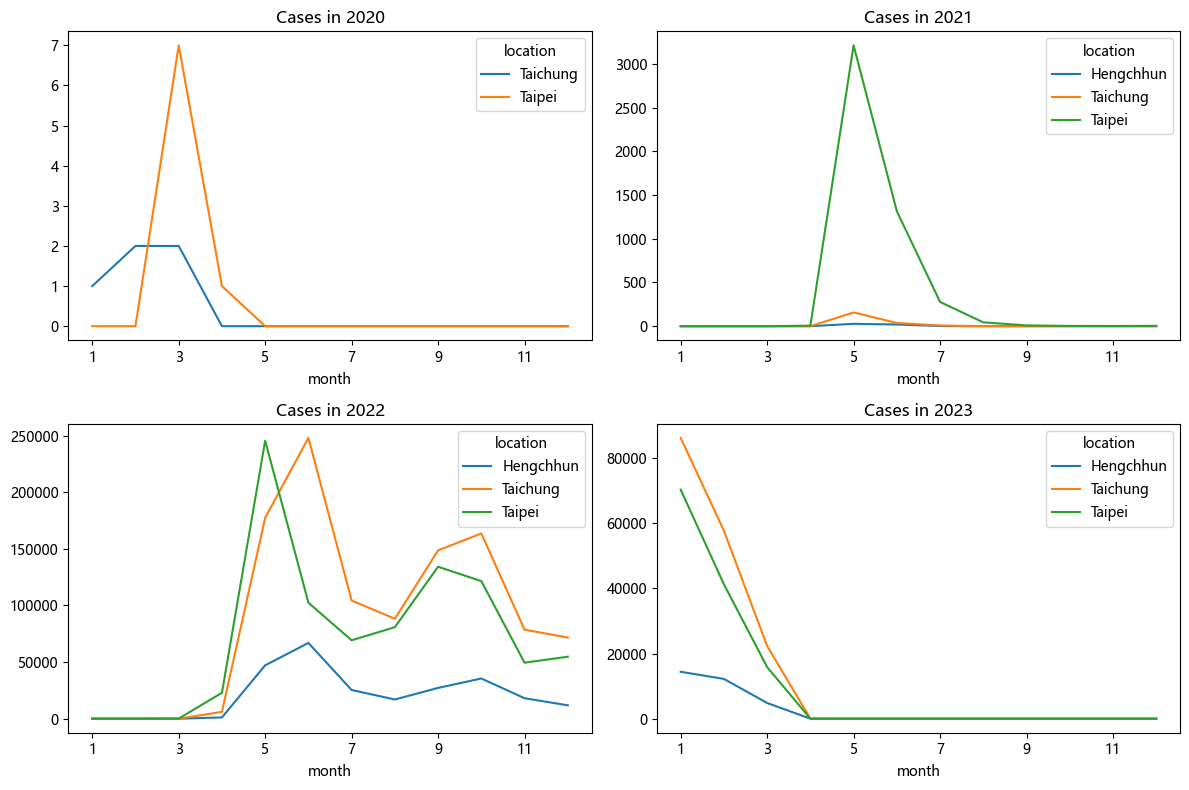

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
years = covid_data['year'].unique()
for idx, year in enumerate(years):
    row_idx = idx//2
    col_idx = idx % 2
    df_year = covid_data[covid_data.year==year]
    df_year.pivot_table(values='cases', index='month', columns='location',aggfunc=np.sum).plot(ax=axes[row_idx, col_idx], title=f'Cases in {year}') 
    plt.tight_layout() #調整子圖之間的距離

In [15]:
covid_data_reportcases_month = covid_data[covid_data.year==2022].groupby(['year','month','location']).cases.sum().reset_index()

In [16]:
temperature_tw.head()

,month,temperature,location,year
1,1,21.9,Hengchhun,2020
2,2,21.9,Hengchhun,2020
3,3,24.0,Hengchhun,2020
4,4,24.7,Hengchhun,2020
5,5,28.0,Hengchhun,2020


In [17]:
merged_data = covid_data_reportcases_month.merge(temperature_tw, on=['year','month','location'], how='left')

In [18]:
merged_data.head()

,year,month,location,cases,temperature
0,2022,1,Hengchhun,1,21.3
1,2022,1,Taichung,2,17.9
2,2022,1,Taipei,30,17.2
3,2022,2,Hengchhun,3,21.3
4,2022,2,Taichung,1,16.8


In [19]:
merged_data.drop('year', axis=1).set_index('month').groupby('location').apply(lambda df_: df_.corr())

C:\Users\cheny\AppData\Local\Temp\ipykernel_35268\1595112272.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.drop('year', axis=1).set_index('month').groupby('location').apply(lambda df_: df_.corr())


cases  temperature
location                                    
Hengchhun cases        1.000000     0.679590
          temperature  0.679590     1.000000
Taichung  cases        1.000000     0.663494
          temperature  0.663494     1.000000
Taipei    cases        1.000000     0.435258
          temperature  0.435258     1.000000

C:\Users\cheny\AppData\Local\Temp\ipykernel_35268\1791201857.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = grouped.get_group(key).corr()


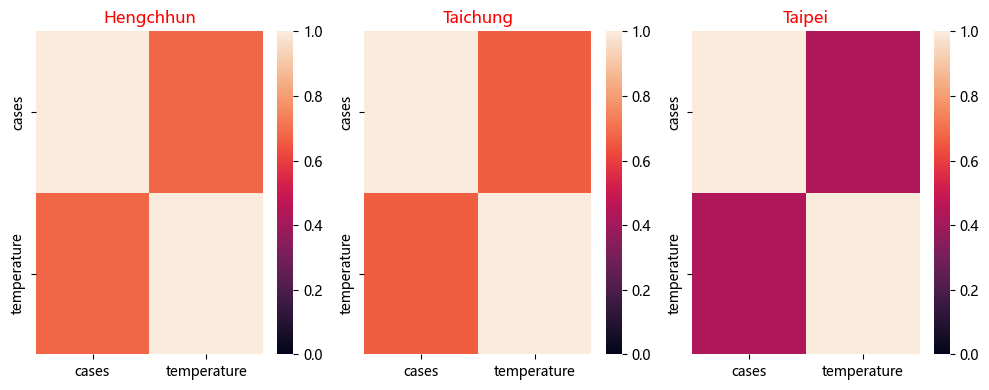

In [20]:
grouped = merged_data.drop('year', axis=1).set_index('month').groupby('location')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
for i, key in enumerate(grouped.groups.keys()):
    corr = grouped.get_group(key).corr()
    sns.heatmap(corr,ax = axes[i], vmin=0, vmax=1)
    axes[i].set_title(f'{key}', loc='center', color='red', size=12)
    plt.tight_layout()

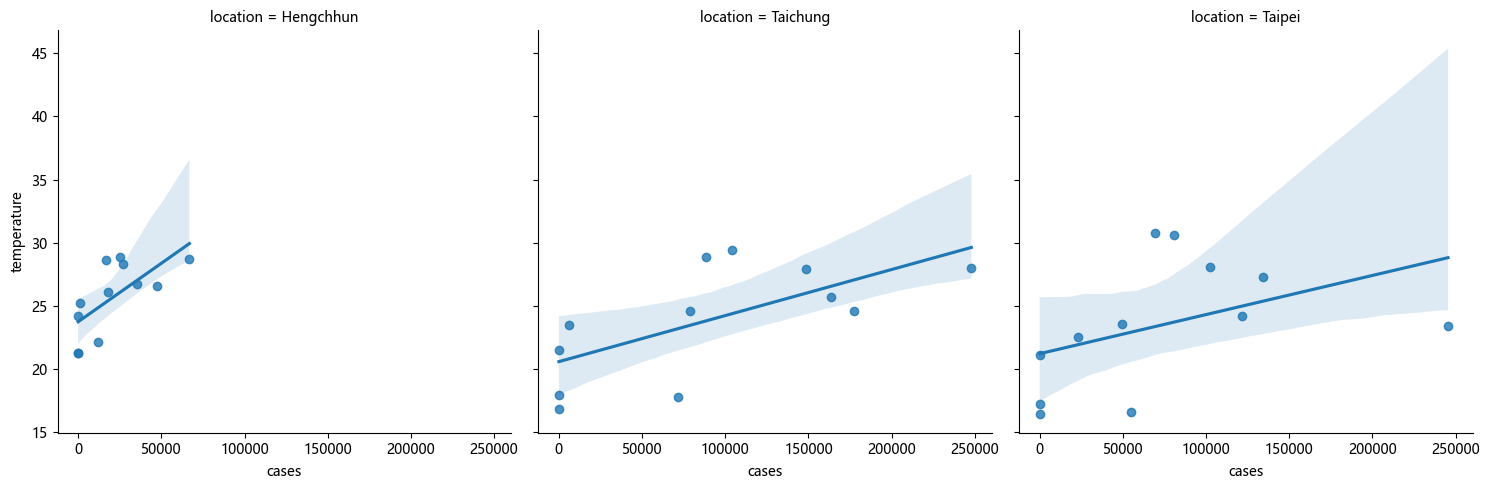

In [21]:
temp_cases_corr = merged_data.drop('year', axis=1)
sns.lmplot(x="cases", y="temperature", data=temp_cases_corr, col='location')